## Basics of deformation, elasticity, and finite elements

Simulating of elastic materials is a lot of fun!

### Deformation (形变)
Deformation map $\phi$: a (vector to vebtor) function that relates rest material
 position and deformed material position.

\begin{equation*}
{\rm x_{deformed}}=\phi({\rm x_{rest}})
\end{equation*}

Deformation gradient ${\rm F}$

\begin{equation*}
{\rm F}:=\displaystyle\frac{\partial{\rm x_{deformed}}}{\partial{\rm x_{rest}}}
\end{equation*}

*Deformation gradients are translational invariant*

$\phi_{1}=\phi({\rm x_{rest}})$ and $\phi_{1}=\phi({\rm x_{rest}})+{\rm c}$ have
 the same deformation gradients!

Deform/rest volume ratio $J=det({\rm F})$

### Hyperelasticity(弹性)
Hyperelasticity materials: materials whose stress-strain relationship is defined by
 a **Strain energy density function(应变能密度函数)**

\begin{equation}
\varPsi = \varPsi({\rm F})
\end{equation}

Intuitive understanding: $\varPsi$ is a potential function that penalizes deformation.<br>
"Stress": the material's internal elastic forces.(应力)<br>
"Strain": just replace it with deformation gradients ${\rm F}$ for now.(应变)

- Be careful<br>
We use $\varPsi$ as the strain energy denisty function and $\phi$ as the deformation map.<br>
They are completely **different**.

### Stress Tensor($3\times 3$矩阵)
**Stress** stands for internal forces that infinitesimal material components exert
 on their neighborhood.

Based on our knowledge, we use different measures of **stress**
- The First Piola-Kirchhoff stress tensor (PK1): ${\rm P(F)}=\frac{\partial\varPsi({\rm F})}{\partial {\rm F}}$
 (easy to compute, but in rest place)
- Kirchhoff stress: $\tau$
- Cauchy stress tensor: $\sigma$ (symmetric, because of conservation of angular
 momentum)

Relationship: $\tau=J\sigma={\rm PF}^{T}$,${\rm P}=J\sigma{\rm F}^{-T}$, Traction $t=\sigma^{T}{\rm n}$

**Intuition of** ${\rm P}=J\sigma{\rm F}^{-T}$: $J$ compensates for material
 compression/expansion.<br>
 ${\rm F}^{-T}$ compensate for material deformation. (Note that it's
  ${\rm F}^{-T}$ instead of ${\rm F}^{-1}$ since we transform the norm $\rm n$ instead
  of $\rm x$.)

### Elastic moduli (isotropic materials)
- Youhng's modulus $E=\displaystyle\frac{\sigma}{\varepsilon}$ (杨氏模量)
- Bulk modulus $K=-V\displaystyle\frac{dP}{dV}$ (体积模量，体积弹性系数)
- Poisson's ratio $\nu\in [0.0,0.5)$ (Auxetics have negative Poisson's ratio) (泊松比)

$\rm Lam\acute{e}$'s modulus:
- $\rm Lam\acute{e}$'s first paramater $\mu$
- $\rm Lam\acute{e}$'s second paramater $\lambda$ (aka. shear modeulus, denoted by $G$)

Useful conversion formula:

\begin{equation*}
K=\displaystyle\frac{E}{3(1-2\nu)},\qquad \lambda=\displaystyle\frac{E\nu}{(1+\nu)(1-2\nu)},\qquad \mu=\displaystyle\frac{E}{2(1+\nu)}
\end{equation*}

### Hyperelastic material models
Popular ones in graphics:
- Linear elasticity (small deformation only)
- Neo-Hookean:
    - $\varPsi({\rm F})=\displaystyle\frac{\mu}{2}\sum_{i}
        \left[({\rm F}^{T}{\rm F})_{ii}-1\right]
        -\mu{\rm log}(J)+\displaystyle\frac{\lambda}{2}{\rm log}^{2}(J).$
    - ${\rm P(F)}=\displaystyle\frac{\partial\varPsi({\rm F})}{\partial {\rm F}}
        =2\mu({\rm F-R})+\lambda{\rm log}(J){\rm F}^{-T}.$
- (Fixed) Corotated:
    - $\varPsi({\rm F})=\displaystyle\mu\sum_{i}
        (\sigma_{i}-1)^{2}+\displaystyle\frac{\lambda}{2}(J-1)^{2}.$
        $\sigma_{i}$ are singular values of ${\rm F}.$
    - ${\rm P(F)}=\displaystyle\frac{\partial\varPsi({\rm F})}{\partial {\rm F}}
        =2\mu({\rm F-R})+\lambda(J-1)J{\rm F}^{-T}.$

### The finite element method (有限元)
**The finite element method:** Galerkin discretization sceme that builds discrete
 equations using weak formulations of continuous PDEs.

![A solution to a discretized partial differential equation, obtained with FEM](Finite_element_solution.png)

#### Linear tetrahedral (triangular) FEM (线性四面体（三角形）变换)
Linear tetrahedral finite elements (for elasticity) asume **the deformation map**
 $\phi$ **is affine and thereby deformation gradient** ${\rm F}$ **is constant**
 within a single tetrahedral element:

\begin{equation*}
{\rm x_{deformed}=Fx_{rest}+b}
\end{equation*}

For every element $e$, its elastic potential energy

\begin{equation*}
U(e)=\int_{e}\varPsi({\rm F(x)}){\rm x}~d{\rm x}=V_{e}\varPsi({\rm F}_{e})
\end{equation*}

Question: how to compute ${\rm F}_{e}({\rm x})$?<br>
Solution: Recal that<br>
\begin{equation*}
{\rm x_{deformed}=Fx_{rest}+b}
\end{equation*}<br>
In 2D triangular elements (3D would be tetrahedral elemets), assuming the
 ${\rm rest}$ positions of the vertices (顶点) are ${\rm a_{rest},b_{rest},c_{rest}}$
 and deformed positions are ${\rm a_{deformed},b_{deformed},c_{deformed}}$. Since
 within an linear triangular element ${\rm F}$ is constant, we have<br>

 \begin{equation*}
 \begin{array}{rcl}
 {\rm a_{deformed}}&=&{\rm Fa_{rest}+b} \\
 {\rm b_{deformed}}&=&{\rm Fb_{rest}+b} \\
 {\rm c_{deformed}}&=&{\rm Fc_{rest}+b}
 \end{array}
 \end{equation*}

Eliminate ${\rm b}$:<br>

 \begin{equation*}
 \begin{array}{rcl}
 {\rm (a_{deformed}-c_{deformed})}&=&{\rm F(a_{rest}-c_{rest})} \\
 {\rm (b_{deformed}-c_{deformed})}&=&{\rm F(b_{rest}-c_{rest})}
 \end{array}
 \end{equation*}

Note that ${\rm F}_{x\times 2}$ now has 4 linear constraints (equations).

 \begin{equation*}
 \begin{array}{rcl}
 {\rm B}&=&{\rm [a_{rest}-c_{rest}|b_{rest}-c_{rest}]}^{-1} \\
 {\rm D}&=&{\rm [a_{deformed}-c_{deformed}|b_{deformed}-c_{deformed}]} \\
 {\rm F}&=&{\rm DB}
 \end{array}
 \end{equation*}

note:$[x|y]$ 代表由$x$组成第一列，$y$组成第二列的矩阵。

($\rm B$ is *constant* through out the physical process. Therefore it should be
 pre-computed. $\rm B$ 是一个常数，因其只与静止状态三角形顶点的位置有关。)

Recall the Semi-implicit Euler (aka. symplectic Euler) time integration.
\begin{equation*}
\begin{array}{rl}
    {\rm v}_ {t+1,i} &= {\rm v}_ {t,i}+\Delta t\displaystyle\frac{{\rm f}_ {t,i}}{m_{i}} \\
    {\rm x}_ {t+1,i} &= {\rm x}_ {t,i}+\Delta t{\rm v}_{t+1,i}
\end{array}
\end{equation*}

Note that ${\rm x}_{t,i}$ and ${\rm v}_{t,i}$ are stored on the *vertices* of
 finite elements (triangles/tetrahedrons).

\begin{equation*}
{\rm f}_{t,i}=-\displaystyle\frac{\partial U}{\partial {\rm x}_{i}}
             =-\sum_{e}\frac{\partial U(e)}{\partial {\rm x}_{i}}
             =-\sum_{e}V_{e}\frac{\partial\varPsi({\rm F}_{e})}{\partial{\rm F}_{e}}\frac{\partial{\rm F}_{e}}{\partial {\rm x}_{i}}
             =-\sum_{e}V_{e}{\rm P}({\rm F}_{e})\frac{\partial {\rm F}_{e}}{\partial {\rm x}_{i}}
\end{equation*}

In [1]:
import taichi as ti
import math

ti.init(arch=ti.gpu)

real = ti.f32
dim = 2
n_nodes_x = 50
n_nodes_y = 6
node_mass = 1
n_nodes = n_nodes_x * n_nodes_y
n_elements = (n_nodes_x - 1) * (n_nodes_y - 1) * 2
dt = 3e-4
dx = 1 / 32
p_mass = 1
p_vol = 1
E, nu = 1000, 0.3
la = E * nu / ((1 + nu) * (1 - 2 * nu))
mu = E / (2 * (1 + nu))
element_V = 0.01

x = ti.Vector.field(dim, dtype=real, shape=n_nodes, needs_grad=True)
v = ti.Vector.field(dim, dtype=real, shape=n_nodes)
B = ti.Matrix.field(dim, dim, dtype=real, shape=n_elements)
total_energy = ti.field(dtype=real, shape=(), needs_grad=True)
vertices = ti.field(dtype=ti.i32, shape=(n_elements, 3))
sphere = ti.Vector.field(dim, dtype=real, shape=())


# print("starting...")

@ti.func
def compute_D(i):
    a = vertices[i, 0]
    b = vertices[i, 1]
    c = vertices[i, 2]
    return ti.Matrix.cols([x[b] - x[a], x[c] - x[a]])


@ti.kernel
def compute_B():
    for i in range(n_elements):
        B[i] = compute_D(i).inverse()


@ti.kernel
def compute_total_energy():
    for i in range(n_elements):
        D = compute_D(i)
        F = D @ B[i]
        # NeoHookean
        I1 = (F @ F.transpose()).trace()
        J = max(0.2, F.determinant())  # avoid J being 0
        element_energy_density = 0.5 * mu * (
                I1 - dim) - mu * ti.log(J) + 0.5 * la * ti.log(J) ** 2
        total_energy[None] += element_energy_density * element_V


sphere[None] = [0.5, 0.2]
sphere_radius = 0.1


@ti.kernel
def integrate():
    for p in x:
        # Collide with sphere
        offset = x[p] - sphere[None]
        if offset.norm() < sphere_radius:
            n = offset.normalized()
            x[p] = sphere[None] + sphere_radius * n
            v[p] = v[p] - v[p].dot(n) * n
        # Collide with ground
        if x[p][1] < 0.2:
            x[p][1] = 0.2
            v[p][1] = 0
        v[p] = (v[p] + ((-x.grad[p] / node_mass)
                        + ti.Vector([0, -10])) * dt) * math.exp(dt * -6)
        x[p] += dt * v[p]


# calculate index of nodes
mesh = lambda i, j: i * n_nodes_y + j

# initialize node state
for i in range(n_nodes_x):
    for j in range(n_nodes_y):
        t = mesh(i, j)
        x[t] = [0.1 + i * dx * 0.5, 0.7 + j * dx * 0.5 + i * dx * 0.1]  # node position in 2D
        v[t] = [0, -1]  # node velocity in 2D

# build mesh
for i in range(n_nodes_x - 1):
    for j in range(n_nodes_y - 1):
        # element id
        eid = (i * (n_nodes_y - 1) + j) * 2
        vertices[eid, 0] = mesh(i, j)
        vertices[eid, 1] = mesh(i + 1, j)
        vertices[eid, 2] = mesh(i, j + 1)

        eid = (i * (n_nodes_y - 1) + j) * 2 + 1
        vertices[eid, 0] = mesh(i, j + 1)
        vertices[eid, 1] = mesh(i + 1, j + 1)
        vertices[eid, 2] = mesh(i + 1, j)

compute_B()

vertices_ = vertices.to_numpy()

gui = ti.GUI("Linear tetrahedral FEM", (640, 640), background_color=0x112F41)

while True:
    for s in range(30):
        # Note that we are now differentiating the total energy w.r.t. the particle position.
        # Recall that F = - \partial (total_energy) / \partial x
        with ti.Tape(total_energy):  # 类似 tf.GradientTape，记录所有数据
            compute_total_energy()
        integrate()

    for e in gui.get_events():
        if e.key == ti.GUI.EXIT:
            break
        elif e.key == ti.GUI.PRESS:
            pass

    if not gui.running:
        break

    # while gui.get_event(ti.GUI.PRESS):
    #     pass
    if gui.is_pressed(ti.GUI.LMB):
        sphere[None] = gui.get_cursor_pos()

    gui.circle((sphere[None][0], sphere[None][1]), radius=63, color=0x068587)

    node_x = x.to_numpy()
    for i in range(n_elements):
        for j in range(3):
            a, b = vertices_[i, j], vertices_[i, (j + 1) % 3]
            gui.line((node_x[a][0], node_x[a][1]),
                     (node_x[b][0], node_x[b][1]),
                     radius=1,
                     color=0x4FB99F)
    gui.circles(node_x, radius=1.5, color=0x3241f4)
    gui.line((0.00, 0.2), (1.0, 0.2), color=0xFFFFFF, radius=3)
    gui.show()


[Taichi] mode=release
[Taichi] version 0.7.20, llvm 10.0.0, commit 284f75ed, win, python 3.8.10
[Taichi] Starting on arch=cuda
[Taichi] materializing...


### Implicit linear linear triangular FEM simulation
Recall backword Euler time integration:
\begin{equation*}
    \left[ {\rm I}-\Delta t^{2}{\rm M^{-1}}\displaystyle\frac{\partial{\rm f}}{\partial{\rm x}}({\rm x}_ {t})\right]{\rm v}_ {t+1}={\rm v}_ {t}\Delta t{\rm M^{-1}f}({\rm x}_{t})
\end{equation*}

Want to implicit time integration? Compute force differentials $\displaystyle\frac{\partial{\rm f}}{\partial {\rm x}}=\displaystyle\frac{\partial^{2}\varPsi}{\partial{\rm x}^{2}}$

*Question*: in both explicit and implicit schemes, how to compute $m_{i}$?<br>
Use mass lumping (or any other convenient approximation you want...)

## The Taichi Programming Language
##### Advanced Featured

- Taichi is a data-oriented programming (DOP) language, but simple DOP maks modulatization
 hard. To improve code resuability, Taichi borrows some concepts from object-oriented
 programming (OOP).
- The hybrid schemes is called **objective data-oriented programming** (ODOP)
- Three important decorators
    - Use ` @ti.data_oriented` to decorate your `class`.
    - Use ` @ti.kernel` to decorate class members functions that are Taichi kernels.
    - Use ` @ti.func` to decorate class members functions that are Taichi functions.

In [5]:
import taichi as ti
import math

ti.init()


@ti.data_oriented
class SolarSystem:
    def __init__(self, n, dt):  # Initializer of the solar system simulator
        self.n = n
        self.dt = dt
        self.x = ti.Vector.field(2, dtype=ti.f32, shape=n)
        self.v = ti.Vector.field(2, dtype=ti.f32, shape=n)
        self.center = ti.Vector.field(2, dtype=ti.f32, shape=())

    @staticmethod
    @ti.func
    def random_vector(radius):  # Create a random vector in circle
        theta = ti.random() * 2 * math.pi
        r = ti.random() * radius
        return r * ti.Vector([ti.cos(theta), ti.sin(theta)])

    @ti.kernel
    def initialize_particles(self):
        # (Re)initialize particle position/velocities
        for i in range(self.n):
            offset = self.random_vector(0.5)
            self.x[i] = self.center[None] + offset  # Offset from center
            self.v[i] = [-offset.y, offset.x]  # Perpendicular to offset
            self.v[i] += self.random_vector(0.02)  # Random velocity noise
            self.v[i] *= 1 / offset.norm() ** 1.5  # Kepler's third law

    @ti.func
    def gravity(self, pos):  # Compute gravity at pos
        offset = -(pos - self.center[None])
        return offset / offset.norm() ** 3

    @ti.kernel
    def integrate(self):  # Semi-implicit Euler time integration
        for i in range(self.n):
            self.v[i] += self.dt * self.gravity(self.x[i])
            self.x[i] += self.dt * self.v[i]

    def render(self, gui):  # Render the scene on GUI
        gui.circle(self.center[None], radius=10, color=0xffaa88)
        gui.circles(solar.x.to_numpy(), radius=3, color=0xffffff)


solar = SolarSystem(8, 0.0001)
solar.center[None] = [0.5, 0.7]
solar.initialize_particles()

gui = ti.GUI("Solar System", background_color=0x0071a)
while gui.running:
    if gui.get_event() and gui.is_pressed(gui.SPACE):
        solar.initialize_particles()  # reinitialize when space bar pressed.

    for i in range(10):  # Time integration
        solar.integrate()

    solar.render(gui)
    gui.show()

[Taichi] Starting on arch=x64
[Taichi] materializing...


#### Metaprogramming

Taichi procides metaprogramming tools. Metaprogramming can
- Allow users to pass almost anything (including Taichi tensors) to Taichi kernels
- Improve run-time performance by moving run-time costs to compile time
- Achieve dimensionality independence (e.g. write 2D and 3D simulation code simultaneously.)
  (二维代码和三维代码写在一起)
- Simplify the development of Taichi standard library

Taichi kernels are **lazily instantiated** (惰性实例化) and a lot of computation can happen at compile time.
 Every kernel in Taichi is a template kernel, even if it has no template arguments.

#### Templates
```
@ti.kernel
def copy(x: ti.template(), y: ti.template(), c: ti.f32):
    for i in x:
        y[i] = x[i] + c
```
##### Template instantiayion
Kernel templates will be instantiated on the frst call, and cached for later calls
with the same template signature
 (see [doc](https://taichi.readthedocs.io/en/latest/compilation.html) for more details).
##### Template argument takes (almost) everything
Feel free to pass tensors, classes, functions, and numerical values to `ti.template()`
arguments

###### Warning:
对于**CPU**和**CUDA**后端，`print`在图形`Python`层（包括*IDLE*和*Jupyter notebook*）中不起作用。
这是因为这些后端将输出打印到控制台而不是GUI。如果你希望在*IDLE/Jupyter*中使用`print` ，请使用
**OpenGL**或**Metal**后端。

In [6]:
import taichi as ti

ti.init(arch=ti.opengl)


# 对于 CPU 和 CUDA 后端， print 在图形 Python 层（包括 IDLE 和 Jupyter notebook）
# 中不起作用。这是因为这些后端将输出打印到控制台而不是 GUI。如果你希望在 IDLE/ Jupyter
# 中使用 print ，请使用 OpenGL 或Metal 后端。

@ti.kernel
def hello(i: ti.template()):
    print(i)


@ti.kernel
def world(i: ti.i32):
    print(i)


print("hello")
for i in range(10):
    hello(i)  # 100 different kernels will be created
for i in range(10):
    world(i)  # The only instance will be reused
print("end")

[Taichi] Starting on arch=opengl
hello
[Taichi] materializing...
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
end


##### Dimensionality-independent programming
```python
@ti.kernel
def copy(x: ti.template(), y: ti.template()):
    for I in ti.grouped(y):
        x[I] = y[I]


@ti.kernel
def array_op(x: ti.template(), y: ti.template()):
    for I in ti.grouped(x):
        # I is a vector of size x.dim() and data type i32
        y[I] = I[0] + I[1]
    # If tensor x is 2D, the above is equivalent to
    for i, j in x:
        y[i, j] = i + j
```

###### Tensor-size reﬂection
Fetch tensor dimensionality info as compile-time constants:

In [7]:
import taichi as ti

ti.init(arch=ti.opengl)

tensor = ti.field(dtype=ti.f32, shape=(4, 8, 16, 32, 64))


@ti.kernel
def print_tensor_size(x: ti.template()):
    print("general shape: ", len(x.shape))
    for i in ti.static(range(len(x.shape))):
        print("the ", i, "th shape:", x.shape[i])


print_tensor_size(tensor)

[Taichi] Starting on arch=opengl
[Taichi] materializing...
general shape:  5
the  0 th shape: 4
the  1 th shape: 8
the  2 th shape: 16
the  3 th shape: 32
the  4 th shape: 64


#### Compile-time branching(编译期分支)
Using compile-time evaluation will allow certain computations to happen when
kernels are being instantiated. This saves the overhead of those computations at
runtime. (C++17 equivalence: `if constexpr`.)
```python
enable_projection = True

@ti.kernel
def static():
    if ti.static(enable_projection):  # No runtime overhead
        x[0] = 1
```

In [8]:
enable_projection = True


@ti.kernel
def static():
    if ti.static(enable_projection):  # No runtime overhead
        x[0] = 1

#### Forced loop-unrolling(循环展开)
Use `ti.static(range(...))` to unroll the loops at compile time:

In [9]:
import taichi as ti

ti.init(arch=ti.opengl)
x = ti.Vector.field(3, dtype=ti.i32, shape=16)


@ti.kernel
def fill():
    for i in x:
        for j in ti.static(range(3)):
            x[i][j] = j
        # 此处j需要利用循环展开，否则会报错：
        # The 0-th index of a Matrix/Vector must be a compile-time constant integer,
        # got <class 'taichi.lang.expr.Expr'>. This is because matrix operations
        # will be **unrolled** at compile-time for performance reason.
        # If you want to *iterate through matrix elements*, use a static range:
        #   for i in ti.static(range(3)):
        #       print(i, "-th component is", vec[i])
        #  See https://taichi.readthedocs.io/en/stable/meta.html#when-to-use-for-loops-with-ti-static
        #  for more details.
        print(x[i])


fill()

[Taichi] Starting on arch=opengl
[Taichi] materializing...
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]


###### When to use range-for loops?
- For performance.
- To loop over vector/matrix elements. Indices into Taichi matrices must be
**compile-time constants**. Indices into Taichi tensors can be run-time
variables. For example, if x is a 1-D tensor of 3D vectors, accessed as<br>
`x[tensor_index][matrix_index]`. The frst index can be a variable, yet the
second must be a constant.

###### Variable aliasing (别名变量)
Creating handy aliases for global variables and functions with cumbersome names
can sometimes improve readability:
```python
@ti.kernel
    def my_kernel():
        for i, j in tensor_a:
            tensor_b[i, j] = some_function(tensor_a[i, j])
```

```python
@ti.kernel
def my_kernel():
    a, b, fun = ti.static(tensor_a , tensor_b , some_function)
    for i,j in a:
        b[i,j] = fun(a[i,j])
```

#### Differentiable Programming (可微编程)
##### Differentiable Programming
Forward programs evaluate $f(x)$, differentiable programs evaluate
 $\frac{\partial f(x)}{\partial x}$<br>
Taichi supports **reverse-mode automatic differentiation (AutoDiff)** that
back-propagates gradients w.r.t. a scalar (loss) function $f(x)$. (反向传播)

Two ways to compute gradients:<br>
1. Use Taichi’s tape (`ti.Tape(loss)`) for both forward and gradient evaluation.
2. Explicitly use **gradient kernels** for gradient evaluation with more controls.

##### Gradient-based optimization
\begin{equation*}
\mathbf{min}_{\mathbf{x}} L(\mathbf{x})=\frac{1}{2}\sum_{i=0}^{n-1}(\mathbf{x}_{i}-\mathbf{y}_{i})^{2}.
\end{equation*}

1. Allocating tensors with gradients:<br>
   `x = ti.var(dt=ti.f32, shape=n, needs_grad=True)`
2. Defning loss function kernel(s):
```python
@ti.kernel
def reduce():
    for i in range(n):
        L[None] += 0.5 * (x[i] - y[i])**2
```
3. Compute loss with `ti.Tape(loss=L): reduce()`
4. Gradient descent: `for i in x: x[i] -= x.grad[i] * 0.1`

In [10]:
# example 1
import taichi as ti
import random

ti.init(arch=ti.opengl)

n = 8
x = ti.field(dtype=ti.f32, shape=n, needs_grad=True)
y = ti.field(dtype=ti.f32, shape=n)
L = ti.field(dtype=ti.f32, shape=(), needs_grad=True)


@ti.kernel
def reduce():
    for i in range(n):
        L[None] += 0.5 * (x[i] - y[i]) ** 2


# Initialize vectors
for i in range(n):
    x[i] = random.random()
    y[i] = random.random()


@ti.kernel
def gradient_descent():
    for i in x:
        x[i] -= x.grad[i] * 0.1


# Optimize with 100 gradient descent iterations
for k in range(100):
    with ti.Tape(loss=L):
        reduce()
    print('Loss =', L[None])
    gradient_descent()

for i in range(n):
    # Now you should approximately have x[i] == y[i]
    print(x[i], y[i])

[Taichi] Starting on arch=opengl
[Taichi] materializing...
Loss = 0.6437497735023499
Loss = 0.5214372873306274
Loss = 0.4223642349243164
Loss = 0.34211498498916626
Loss = 0.277113139629364
Loss = 0.2244616448879242
Loss = 0.18181392550468445
Loss = 0.14726927876472473
Loss = 0.1192881166934967
Loss = 0.09662335366010666
Loss = 0.07826491445302963
Loss = 0.06339459121227264
Loss = 0.05134962499141693
Loss = 0.041593197733163834
Loss = 0.03369048982858658
Loss = 0.02728930115699768
Loss = 0.022104337811470032
Loss = 0.01790451630949974
Loss = 0.01450265757739544
Loss = 0.011747147887945175
Loss = 0.0095151886343956
Loss = 0.007707303389906883
Loss = 0.00624291505664587
Loss = 0.005056761670857668
Loss = 0.0040959762409329414
Loss = 0.0033177388831973076
Loss = 0.002687369007617235
Loss = 0.0021767683792859316
Loss = 0.0017631817609071732
Loss = 0.0014281765324994922
Loss = 0.0011568213813006878
Loss = 0.0009370249463245273
Loss = 0.000758990878239274
Loss = 0.0006147822132334113
Loss = 0

[Taichi] Starting on arch=opengl
[Taichi] materializing...
y

Loss = 251.48031616210938
0.008818906731903553, -0.004227034747600555, 0.005210476461797953, 0.0030906950123608112, 
Loss = 250.16397094726562
0.017586003988981247, -0.008476778864860535, 0.010300752706825733, 0.006045310292392969, 
Loss = 248.875
0.02630193904042244, -0.012747148983180523, 0.015272866003215313, 0.008873098529875278, 
Loss = 247.61215209960938
0.03496735915541649, -0.017036208882927895, 0.020128823816776276, 0.011582676321268082, 
Loss = 246.3741455078125
0.04358290135860443, -0.021342160180211067, 0.024870596826076508, 0.01418206188827753, 
Loss = 245.1598358154297
0.05214919522404671, -0.025663333013653755, 0.029500126838684082, 0.01667872443795204, 
Loss = 243.96815490722656
0.06066686660051346, -0.0299981739372015, 0.03401932492852211, 0.01907961629331112, 
Loss = 242.7981719970703
0.06913653016090393, -0.03434523940086365, 0.03843006491661072, 0.021391212940216064, 
Loss = 241.64895629882812
0.077558793

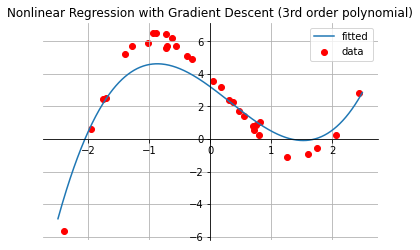

In [11]:
# example 2
import taichi as ti
import taichi as tc
import matplotlib.pyplot as plt
import random
import numpy as np

ti.init(arch=ti.opengl)
tc.set_gdb_trigger(True)

number_coeffs = 4
learning_rate = 1e-4

N = 32
x, y = ti.field(ti.f32, shape=N, needs_grad=True), ti.field(ti.f32, shape=N, needs_grad=True)
coeffs = ti.field(ti.f32, shape=number_coeffs, needs_grad=True)
loss = ti.field(ti.f32, shape=(), needs_grad=True)


@ti.kernel
def regress():
    for i in x:
        v = x[i]
        est = 0.0
        for j in ti.static(range(number_coeffs)):
            est += coeffs[j] * (v ** j)
        loss[None] += 0.5 * (y[i] - est) ** 2


@ti.kernel
def update():
    for i in ti.static(range(number_coeffs)):
        coeffs[i] -= learning_rate * coeffs.grad[i]


xs = []
ys = []

for i in range(N):
    v = random.random() * 5 - 2.5
    xs.append(v)
    x[i] = v
    y[i] = (v - 1) * (v - 2) * (v + 2) + random.random() - 0.5

regress()

print('y')
for i in range(N):
    y.grad[i] = 1
    ys.append(y[i])
print()

use_tape = True

for i in range(1000):
    if use_tape:
        with ti.Tape(loss=loss):
            regress()
    else:
        ti.clear_all_gradients()
        loss[None] = 0
        loss.grad[None] = 1
        regress()
        regress.grad()
    print('Loss =', loss[None])
    update()
    for i in range(number_coeffs):
        print(coeffs[i], end=', ')
    print()

curve_xs = np.arange(-2.5, 2.5, 0.01)
curve_ys = curve_xs * 0
for i in range(number_coeffs):
    curve_ys += coeffs[i] * np.power(curve_xs, i)

plt.title('Nonlinear Regression with Gradient Descent (3rd order polynomial)')
ax = plt.gca()
ax.scatter(xs, ys, label='data', color='r')
ax.plot(curve_xs, curve_ys, label='fitted')
ax.legend()
ax.grid(True)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.show()

##### Application 1: Forces from potential energy gradients
From the defnition of potential energy:<br>
\begin{equation*}
\mathbf{f}_{i}=\frac{\partial\phi(\mathbf{x})}{\partial\mathbf{x}_{i}}
\end{equation*}<br>
Manually deriving gradients is hard. Let’s use AutoDff:
1. Allocate a 0−D tensor to store the potential energy:<br>
`potential = ti.field(ti.f32, shape=())`.
2. Define forward kernels that computes potential energy from `x[i]`.
3. In a `ti.Tape(loss=potential)`, call the forward kernels.
4. Force on each particle is `-x.grad[i]`.

Demo: mpm_lagrangian_forces

In [12]:
import taichi as ti
import numpy as np

ti.init(arch=ti.gpu)

dim = 2
quality = 1  # Use a larger integral number for higher quality
n_particle_x = 100 * quality
n_particle_y = 8 * quality
n_particles = n_particle_x * n_particle_y
n_elements = (n_particle_x - 1) * (n_particle_y - 1) * 2
n_grid = 64 * quality
dx = 1 / n_grid
inv_dx = 1 / dx
dt = 1e-3 / quality
E = 250
p_mass = 1
p_vol = 1
mu = 1
la = 1

# x为2 x 1向量，其每一个元素为n_particles x 1的张量
x = ti.Vector.field(dim, dtype=float, shape=n_particles, needs_grad=True)
v = ti.Vector.field(dim, dtype=float, shape=n_particles)
# C为2 x 2矩阵，其每一个元素为n_particles x 1的张量
C = ti.Matrix.field(dim, dim, dtype=float, shape=n_particles)
grid_v = ti.Vector.field(dim, dtype=float, shape=(n_grid, n_grid))
grid_m = ti.field(dtype=float, shape=(n_grid, n_grid))
restT = ti.Matrix.field(dim,
                        dim,
                        dtype=float,
                        shape=n_particles,
                        needs_grad=True)
total_energy = ti.field(dtype=float, shape=(), needs_grad=True)
vertices = ti.field(dtype=ti.i32, shape=(n_elements, 3))


@ti.func
def mesh(i, j):
    return i * n_particle_y + j


@ti.func
def compute_T(i):
    a = vertices[i, 0]
    b = vertices[i, 1]
    c = vertices[i, 2]
    ab = x[b] - x[a]
    ac = x[c] - x[a]
    return ti.Matrix([[ab[0], ac[0]], [ab[1], ac[1]]])


@ti.kernel
def initialize():
    for i in range(n_particle_x):
        for j in range(n_particle_y):
            t = mesh(i, j)
            x[t] = [0.1 + i * dx * 0.5, 0.7 + j * dx * 0.5]
            v[t] = [0, -1]

    # build mesh
    for i in range(n_particle_x - 1):
        for j in range(n_particle_y - 1):
            # element id
            eid = (i * (n_particle_y - 1) + j) * 2
            vertices[eid, 0] = mesh(i, j)
            vertices[eid, 1] = mesh(i + 1, j)
            vertices[eid, 2] = mesh(i, j + 1)

            eid = (i * (n_particle_y - 1) + j) * 2 + 1
            vertices[eid, 0] = mesh(i, j + 1)
            vertices[eid, 1] = mesh(i + 1, j + 1)
            vertices[eid, 2] = mesh(i + 1, j)

    for i in range(n_elements):
        restT[i] = compute_T(i)  # Compute rest T


@ti.kernel
def compute_total_energy():
    for i in range(n_elements):
        currentT = compute_T(i)
        F = currentT @ restT[i].inverse()
        # NeoHookean
        I1 = (F @ F.transpose()).trace()
        J = F.determinant()
        element_energy = 0.5 * mu * (
                I1 - 2) - mu * ti.log(J) + 0.5 * la * ti.log(J) ** 2
        total_energy[None] += E * element_energy * dx * dx


@ti.kernel
def p2g():
    for p in x:
        base = ti.cast(x[p] * inv_dx - 0.5, ti.i32)
        fx = x[p] * inv_dx - ti.cast(base, float)
        w = [0.5 * (1.5 - fx) ** 2, 0.75 - (fx - 1) ** 2, 0.5 * (fx - 0.5) ** 2]
        affine = p_mass * C[p]
        for i in ti.static(range(3)):
            for j in ti.static(range(3)):
                I = ti.Vector([i, j])
                dpos = (float(I) - fx) * dx
                weight = w[i].x * w[j].y
                grid_v[base + I] += weight * (p_mass * v[p] - x.grad[p] +
                                              affine @ dpos)
                grid_m[base + I] += weight * p_mass


bound = 3


@ti.kernel
def grid_op():
    for i, j in grid_m:
        if grid_m[i, j] > 0:
            inv_m = 1 / grid_m[i, j]
            grid_v[i, j] = inv_m * grid_v[i, j]
            grid_v[i, j].y -= dt * 9.8

            # center collision circle
            dist = ti.Vector([i * dx - 0.5, j * dx - 0.5])
            if dist.norm_sqr() < 0.005:
                dist = dist.normalized()
                grid_v[i, j] -= dist * min(0, grid_v[i, j].dot(dist))

            # box
            if i < bound and grid_v[i, j].x < 0:
                grid_v[i, j].x = 0
            if i > n_grid - bound and grid_v[i, j].x > 0:
                grid_v[i, j].x = 0
            if j < bound and grid_v[i, j].y < 0:
                grid_v[i, j].y = 0
            if j > n_grid - bound and grid_v[i, j].y > 0:
                grid_v[i, j].y = 0


@ti.kernel
def g2p():
    for p in x:
        base = ti.cast(x[p] * inv_dx - 0.5, ti.i32)
        fx = x[p] * inv_dx - float(base)
        w = [0.5 * (1.5 - fx) ** 2, 0.75 - (fx - 1.0) ** 2, 0.5 * (fx - 0.5) ** 2]
        new_v = ti.Vector([0.0, 0.0])
        new_C = ti.Matrix([[0.0, 0.0], [0.0, 0.0]])

        for i in ti.static(range(3)):
            for j in ti.static(range(3)):
                I = ti.Vector([i, j])
                dpos = float(I) - fx
                g_v = grid_v[base + I]
                weight = w[i].x * w[j].y
                new_v += weight * g_v
                new_C += 4 * weight * g_v.outer_product(dpos) * inv_dx

        v[p] = new_v
        x[p] += dt * v[p]
        C[p] = new_C


gui = ti.GUI("MPM", (640, 640), background_color=0x112F41)


def main():
    initialize()

    vertices_ = vertices.to_numpy()

    while gui.running and not gui.get_event(gui.ESCAPE):
        for s in range(int(1e-2 // dt)):
            grid_m.fill(0)
            grid_v.fill(0)
            # Note that we are now differentiating the total energy w.r.t. the particle position.
            # Recall that F = - \partial (total_energy) / \partial x
            with ti.Tape(total_energy):
                # Do the forward computation of total energy and backward propagation for x.grad, which is later used in p2g
                compute_total_energy()
                # It's OK not to use the computed total_energy at all, since we only need x.grad
            p2g()
            grid_op()
            g2p()

        gui.circle((0.5, 0.5), radius=45, color=0x068587)
        particle_pos = x.to_numpy()
        a = vertices_.reshape(n_elements * 3)
        b = np.roll(vertices_, shift=1, axis=1).reshape(n_elements * 3)
        gui.lines(particle_pos[a], particle_pos[b], radius=1, color=0x4FB99F)
        gui.circles(particle_pos, radius=1.5, color=0xF2B134)
        gui.line((0.00, 0.03 / quality), (1.0, 0.03 / quality),
                 color=0xFFFFFF,
                 radius=3)
        gui.show()


if __name__ == '__main__':
    main()

[Taichi] Starting on arch=cuda
[Taichi] materializing...


##### Application 2: Dfferentiating a whole physical process
10 Demos: DffTaichi $(\mathbf{x}_{t+1}, \mathbf{v}_{t+1}, ...) = \mathbf{F}(\mathbf{x}_{t}, \mathbf{v}_{t}, ...)$<br>
Pattern:
```python
import taichi as ti
with ti.Tape(loss=loss):
    for i in range(steps - 1):
        simulate(i)
```
###### Computational history
Always keep the whole computational history of time steps for end-to-end
dfferentiation. I.e., instead of only allocating<br>
`ti.Vector(3, dt=ti.f32, shape=(num_particles))` that stores the latest particles,
allocate for the whole simulation process<br>
`ti.Vector(3, dt=ti.f32, shape=(num_timesteps, num_particles))`. Do not overwrite!
(Use checkpointing (later in this course) to reduce memory consumption.)

$\blacksquare$